# Exploratory Data Analysis Using Python and BigQuery



## Learning Objectives

1. Analyze a Pandas Dataframe
2. Create Seaborn plots for Exploratory Data Analysis in Python 
3. Write a SQL query to pick up specific fields from a BigQuery dataset
4. Exploratory Analysis in BigQuery


## Introduction 
This lab is an introduction to linear regression using Python and Scikit-Learn.  This lab serves as a foundation for more complex algorithms and machine learning models that you will encounter in the course. We will train a linear regression model to predict housing price.

Each learning objective will correspond to a __#TODO__ in the [student lab notebook](../labs/python.BQ_explore_data.ipynb) -- try to complete that notebook first before reviewing this solution notebook. 


### Import Libraries

In [ ]:
# Run the chown command to change the ownership
!sudo chown -R jupyter:jupyter /home/jupyter/training-data-analyst

In [5]:
# Install the Google Cloud BigQuery library
# !pip install --user google-cloud-bigquery>=2.34.4
!pip install --user google-cloud-bigquery google-cloud-bigquery-storage pyarrow db-dtypes

Please ignore any incompatibility warnings and errors.


**Restart** the kernel before proceeding further (On the Notebook menu - Kernel - Restart Kernel).


In [8]:
# You can use any Python source file as a module by executing an import statement in some other Python source file.
# The import statement combines two operations; it searches for the named module, then it binds the results of that search
# to a name in the local scope.
import os 
import pandas as pd
import numpy as np
# Import matplotlib to visualize the model
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
%matplotlib inline   

###  Load the Dataset



Here, we create a directory called usahousing.  This directory will hold the dataset that we copy from Google Cloud Storage.

In [5]:
# Create a directory to hold the dataset
if not os.path.isdir("../data/explore"):
    os.makedirs("../data/explore")

Next, we copy the Usahousing dataset from Google Cloud Storage.

In [6]:
# Copy the file using `gsutil cp` from Google Cloud Storage in the required directory
!gsutil cp gs://cloud-training/mlongcp/v3.0_MLonGC/toy_data/housing_pre-proc_toy.csv ../data/explore  



Updates are available for some Google Cloud CLI components.  To install them,
please run:
  $ gcloud components update

Copying gs://cloud-training/mlongcp/v3.0_MLonGC/toy_data/housing_pre-proc_toy.csv...
/ [1 files][138.8 KiB/138.8 KiB]                                                
Operation completed over 1 objects/138.8 KiB.                                    


Then we use the "ls" command to list files in the directory.  This ensures that the dataset was copied.

In [7]:
# `ls` shows the working directory's contents.  
# The `l` flag list the all files with permissions and details
!ls -l ../data/explore

total 280
-rw-r--r--@ 1 zhao  staff  142150 Aug  1 08:27 housing_pre-proc_toy.csv


Next, we read the dataset into a Pandas dataframe.

In [8]:
# TODO 1
# Read a comma-separated values (csv) file into a DataFrame using the read_csv() function
df_USAhousing = pd.read_csv('../data/explore/housing_pre-proc_toy.csv')

###  Inspect the Data

In [9]:
# Get the first five rows using the head() method

df_USAhousing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


Let's check for any null values.

In [10]:
# `isnull()` finds a null value in a column and `sum()` counts it
df_USAhousing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
# Get some basic statistical details using describe() method
df_stats = df_USAhousing.describe()
# Transpose index and columns of the dataframe
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
longitude,2500.0,-121.501836,1.015963,-124.3000,-122.200000,-122.0300,-120.697500,-118.9100
latitude,2500.0,37.802288,0.803090,36.1300,37.600000,37.8000,37.960000,41.9500
housing_median_age,2500.0,30.088400,13.878416,2.0000,18.000000,30.0000,41.000000,52.0000
total_rooms,2500.0,2522.734000,1988.411988,12.0000,1420.750000,2052.0000,3007.250000,28258.0000
total_bedrooms,2500.0,491.862400,362.499497,4.0000,282.000000,402.0000,581.250000,3864.0000
population,2500.0,1246.225200,925.075463,18.0000,718.000000,1030.5000,1488.250000,12203.0000
households,2500.0,458.122000,341.744308,2.0000,263.000000,374.5000,538.000000,3701.0000
median_income,2500.0,3.694312,1.859422,0.4999,2.357875,3.2622,4.662975,15.0001
median_house_value,2500.0,170288.731200,97550.278529,22500.0000,92950.000000,150800.0000,219650.000000,500001.0000


In [12]:
# Get a concise summary of a DataFrame
df_USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2500 non-null   float64
 1   latitude            2500 non-null   float64
 2   housing_median_age  2500 non-null   int64  
 3   total_rooms         2500 non-null   int64  
 4   total_bedrooms      2500 non-null   int64  
 5   population          2500 non-null   int64  
 6   households          2500 non-null   int64  
 7   median_income       2500 non-null   float64
 8   median_house_value  2500 non-null   int64  
 9   ocean_proximity     2500 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 195.4+ KB


Let's take a peek at the first and last five rows of the data for all columns.

In [13]:
print ("Rows     : " ,df_USAhousing.shape[0])
print ("Columns  : " ,df_USAhousing.shape[1])
print ("\nFeatures : \n" ,df_USAhousing.columns.tolist())
print ("\nMissing values :  ", df_USAhousing.isnull().sum().values.sum())
print ("\nUnique values :  \n",df_USAhousing
       .nunique())

Rows     :  2500
Columns  :  10

Features : 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

Missing values :   0

Unique values :  
 longitude              265
latitude               275
housing_median_age      51
total_rooms           1889
total_bedrooms         922
population            1520
households             890
median_income         2186
median_house_value    1553
ocean_proximity          4
dtype: int64


## Explore the Data

Let's create some simple plots to check out the data!  

<AxesSubplot:>

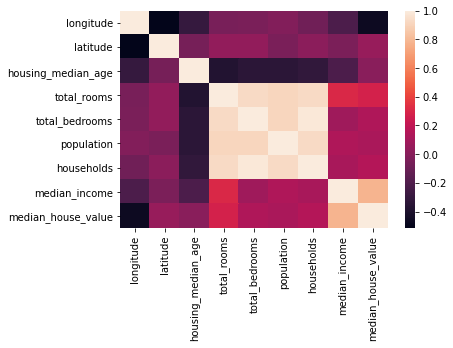

In [20]:
# `heatmap` plots a rectangular data in a color-encoded matrix and
# `corr` finds the pairwise correlation of all columns in the dataframe
sns.heatmap(df_USAhousing.corr())

Create a displot showing "median_house_value".

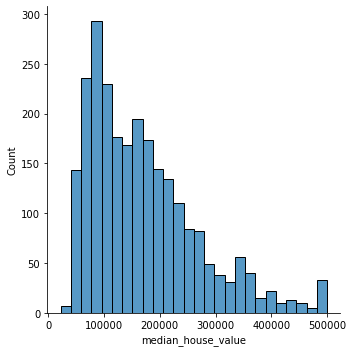

In [21]:
# TODO 2a
# Plot a univariate distribution of observations using seaborn `distplot()` function
sns.displot(df_USAhousing['median_house_value'])

Text(0.5, 0, 'median_house_value')

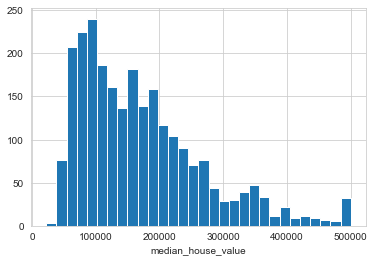

In [24]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')
# Plot a histogram using `hist()` function
df_USAhousing['median_house_value'].hist(bins=30)
plt.xlabel('median_house_value')

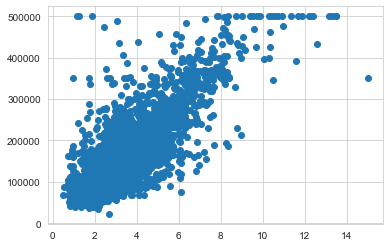

In [27]:
x = df_USAhousing['median_income']
y = df_USAhousing['median_house_value']

# Scatter plot of y vs x using scatter() and `show()` display all open figures
plt.scatter(x, y)
plt.show()

Create a jointplot showing "median_income"  versus "median_house_value".

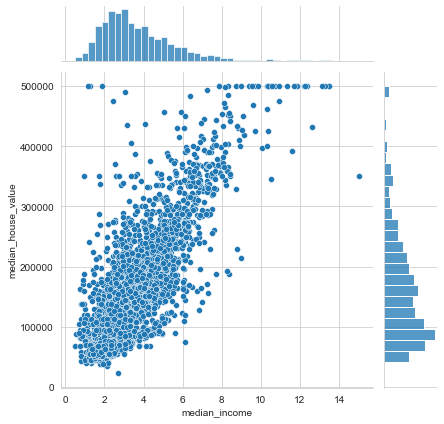

In [26]:
# TODO 2b
# `joinplot()` draws a plot of two variables with bivariate and univariate graphs.
sns.jointplot(x='median_income',y='median_house_value',data=df_USAhousing)

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

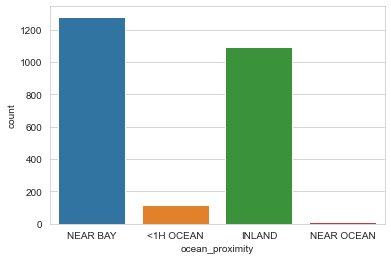

In [29]:
# `countplot()` shows the counts of observations in each categorical bin using bars
sns.countplot(x = 'ocean_proximity', data=df_USAhousing)

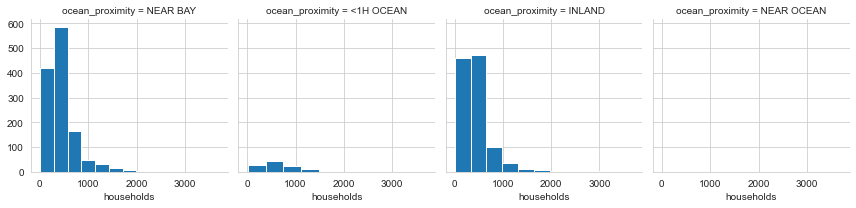

In [39]:
# takes numeric only?
# plt.figure(figsize=(20,20))
# Draw a multi-plot on every facet using `FacetGrid()`
g = sns.FacetGrid(df_USAhousing, col="ocean_proximity")
# Pass a function and the name of one or more columns in the dataframe
g.map(plt.hist, "households");

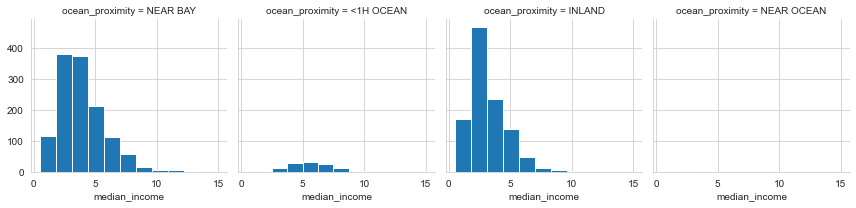

In [40]:
# takes numeric only?
# plt.figure(figsize=(20,20))
# Draw a multi-plot on every facet using `FacetGrid()`
g = sns.FacetGrid(df_USAhousing, col="ocean_proximity")
# Pass a function and the name of one or more columns in the dataframe
g.map(plt.hist, "median_income");

You can see below that this is the state of California!

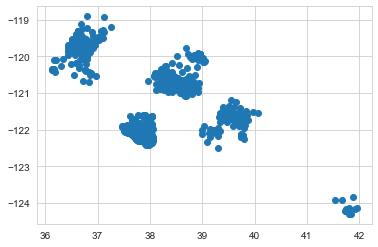

In [41]:
x = df_USAhousing['latitude']
y = df_USAhousing['longitude']

# Scatter plot of y vs x and display all open figures
plt.scatter(x, y)
plt.show()

# Explore and create ML datasets

In this notebook, we will explore data corresponding to taxi rides in New York City to build a Machine Learning model in support of a fare-estimation tool. The idea is to suggest a likely fare to taxi riders so that they are not surprised, and so that they can protest if the charge is much higher than expected.

## Learning objectives
* Access and explore a public BigQuery dataset on NYC Taxi Cab rides
* Visualize your dataset using the Seaborn library


First, **restart the Kernel**.  Now, let's start with the Python imports that we need.

In [42]:
# Import the python libraries
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


<h3> Extract sample data from BigQuery </h3>

The dataset that we will use is <a href="https://console.cloud.google.com/bigquery?project=nyc-tlc&p=nyc-tlc&d=yellow&t=trips&page=table">a BigQuery public dataset</a>. Click on the link, and look at the column names. Switch to the Details tab to verify that the number of records is one billion, and then switch to the Preview tab to look at a few rows.

Let's write a SQL query to pick up interesting fields from the dataset. It's a good idea to get the timestamp in a predictable format.

In [65]:
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=EX3qBE8XOkhrEmd3zjrlsVzVxWTVhE&access_type=offline&code_challenge=0RZESIQ6pAQFZP3lu2Tv1p89waiLQ4ht5S7P1IAL5Dw&code_challenge_method=S256


Credentials saved to file: [/Users/zhao/.config/gcloud/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "mwpmltr" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project owning the resource.


In [1]:
!gcloud config list

[core]
account = zach.zhao@mavenwave.com
disable_usage_reporting = False
project = mwpmltr

Your active configuration is: [default]


In [2]:
%load_ext google.cloud.bigquery


/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
%%bigquery
# SQL query to get a fields from dataset which prints the 10 records
SELECT
    FORMAT_TIMESTAMP(
        "%Y-%m-%d %H:%M:%S %Z", pickup_datetime) AS pickup_datetime,
    pickup_longitude, pickup_latitude, dropoff_longitude,
    dropoff_latitude, passenger_count, trip_distance, tolls_amount, 
    fare_amount, total_amount 
# TODO 3
FROM
    `nyc-tlc.yellow.trips`
LIMIT 10

Query is running:   0%|          |

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


Downloading:   0%|          |

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
0,2015-04-23 03:12:44 UTC,-73.937607,40.758240,-73.937607,40.758240,1,0.00,0.0,0.0,0.0
1,2013-08-02 02:13:53 UTC,-74.158324,40.726389,-73.976880,40.754245,1,141.20,0.0,0.0,0.0
2,2010-03-19 23:43:13 UTC,-73.783654,40.646393,-73.981207,40.765027,2,18.40,0.0,0.0,0.0
3,2015-02-25 17:09:24 UTC,-73.987434,40.768669,0.000000,0.000000,1,0.00,0.0,0.0,0.0
4,2015-05-04 08:03:49 UTC,-73.903419,40.880844,-73.903419,40.880848,1,0.00,0.0,0.0,0.0
5,2013-08-09 09:35:00 UTC,0.000000,0.000000,0.000000,0.000000,5,1.04,0.0,0.0,0.0
6,2010-03-27 22:06:48 UTC,-74.007362,40.748283,-74.007364,40.748291,1,0.00,0.0,0.0,0.0
7,2010-03-28 13:30:52 UTC,-73.931069,40.736800,-73.786488,40.639092,1,131.40,0.0,0.0,0.0
8,2015-03-18 09:57:20 UTC,-73.902092,40.764278,-73.902100,40.764271,1,0.00,0.0,0.0,0.0
9,2010-03-18 23:40:22 UTC,-73.984649,40.731303,-73.985467,40.731640,1,0.00,0.0,0.0,0.0


Let's increase the number of records so that we can do some neat graphs.  There is no guarantee about the order in which records are returned, and so no guarantee about which records get returned if we simply increase the LIMIT. To properly sample the dataset, let's use the HASH of the pickup time and return 1 in 100,000 records -- because there are 1 billion records in the data, we should get back approximately 10,000 records if we do this.

We will also store the BigQuery result in a Pandas dataframe named "trips"

In [19]:
%%bigquery trips
SELECT
    FORMAT_TIMESTAMP(
        "%Y-%m-%d %H:%M:%S %Z", pickup_datetime) AS pickup_datetime,
    pickup_longitude, pickup_latitude, 
    dropoff_longitude, dropoff_latitude,
    passenger_count,
    trip_distance,
    tolls_amount,
    fare_amount,
    total_amount
FROM
    `nyc-tlc.yellow.trips`
WHERE
    ABS(MOD(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING)), 100000)) = 1

Query is running:   0%|          |

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


Downloading:   0%|          |

In [20]:
print(len(trips))

10789


In [18]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    10716 non-null  object 
 1   pickup_longitude   10716 non-null  float64
 2   pickup_latitude    10716 non-null  float64
 3   dropoff_longitude  10716 non-null  float64
 4   dropoff_latitude   10716 non-null  float64
 5   passenger_count    10716 non-null  Int64  
 6   trip_distance      10716 non-null  float64
 7   tolls_amount       10716 non-null  float64
 8   fare_amount        10716 non-null  float64
 9   total_amount       10716 non-null  float64
dtypes: Int64(1), float64(8), object(1)
memory usage: 847.8+ KB


In [17]:
# We can slice Pandas dataframes as if they were arrays
trips[:10]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
0,2014-04-11 00:16:56 UTC,-73.995064,40.721451,-74.038159,40.616236,2,11.10,0.00,31.5,41.50
1,2009-09-16 20:45:23 UTC,-73.987603,40.728781,-73.998216,40.677855,1,6.10,0.00,16.9,17.40
2,2013-12-06 14:55:00 UTC,-74.012152,40.713567,-73.987077,40.750587,2,3.91,0.00,17.5,21.00
3,2013-05-01 17:30:03 UTC,-73.992180,40.764457,-74.006067,40.744886,1,2.20,0.00,18.0,19.50
4,2010-12-21 13:08:00 UTC,-73.986452,40.761690,-73.871350,40.773852,3,10.90,4.57,28.9,39.75
5,2012-03-04 00:57:00 UTC,-74.004595,40.741882,-73.950250,40.787300,1,5.53,0.00,16.1,20.42
6,2010-05-22 12:30:55 UTC,-73.947361,40.775829,-73.993657,40.721529,2,5.70,0.00,17.7,18.20
7,2013-01-29 05:21:00 UTC,-74.003900,40.717222,-73.955505,40.777727,2,7.62,0.00,22.5,28.10
8,2013-10-13 04:35:45 UTC,-73.998057,40.763300,-73.915878,40.832179,1,9.10,0.00,30.5,31.50
9,2009-01-23 05:49:07 UTC,-73.987462,40.760523,-73.978658,40.752389,1,1.00,0.00,5.4,5.40


<h3> Exploring data </h3>

Let's explore this dataset and clean it up as necessary. We'll use the Python Seaborn package to visualize graphs and Pandas to do the slicing and filtering.

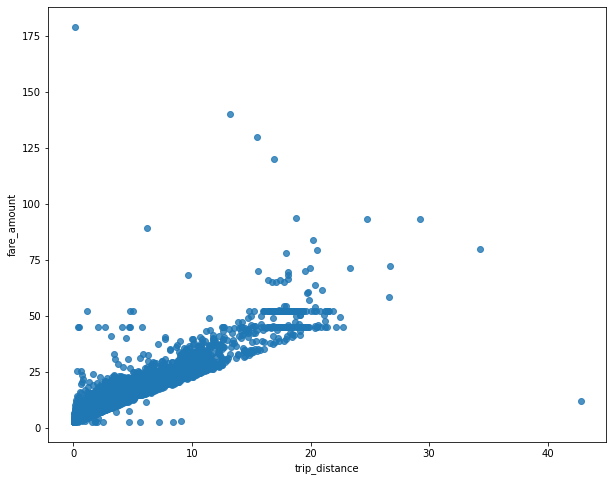

In [21]:
# TODO 4
# Use Seaborn `regplot()` function to plot the data and a linear regression model fit.
ax = sns.regplot(
    x="trip_distance", y="fare_amount",
    fit_reg=False, ci=None, truncate=True, data=trips)
ax.figure.set_size_inches(10, 8)

Hmm ... do you see something wrong with the data that needs addressing?

It appears that we have a lot of invalid data that is being coded as zero distance and some fare amounts that are definitely illegitimate. Let's remove them from our analysis. We can do this by modifying the BigQuery query to keep only trips longer than zero miles and fare amounts that are at least the minimum cab fare ($2.50).

Note the extra WHERE clauses.

In [10]:
%%bigquery trips
# SQL query with where clause to save the results in the trips dataframe
SELECT
    FORMAT_TIMESTAMP(
        "%Y-%m-%d %H:%M:%S %Z", pickup_datetime) AS pickup_datetime,
    pickup_longitude, pickup_latitude, 
    dropoff_longitude, dropoff_latitude,
    passenger_count,
    trip_distance,
    tolls_amount,
    fare_amount,
    total_amount
FROM
    `nyc-tlc.yellow.trips`
WHERE
    ABS(MOD(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING)), 100000)) = 1
# TODO 4a
    AND trip_distance > 0
    AND fare_amount >= 2.5

Query is running:   0%|          |

/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/Users/zhao/opt/anaconda3/lib/python3.8/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


Downloading:   0%|          |

In [11]:
print(len(trips))

10716


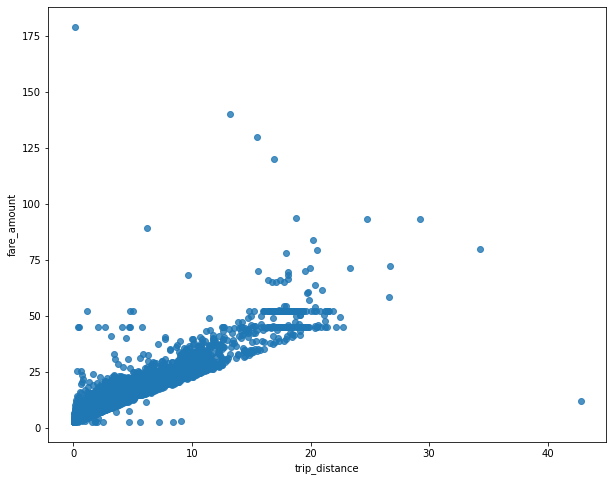

In [12]:
# Use Seaborn `regplot()` function to plot the data and a linear regression model fit.
ax = sns.regplot(
    x="trip_distance", y="fare_amount",
    fit_reg=False, ci=None, truncate=True, data=trips)
ax.figure.set_size_inches(10, 8)

What's up with the streaks around 45 dollars and 50 dollars?  Those are fixed-amount rides from JFK and La Guardia airports into anywhere in Manhattan, i.e. to be expected. Let's list the data to make sure the values look reasonable.

Let's also examine whether the toll amount is captured in the total amount.

In [13]:
tollrides = trips[trips["tolls_amount"] > 0]
tollrides[tollrides["pickup_datetime"] == "2012-02-27 09:19:10 UTC"]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
1093,2012-02-27 09:19:10 UTC,-73.874431,40.774011,-73.983967,40.744082,1,11.6,4.8,27.7,38.0


In [14]:
notollrides = trips[trips["tolls_amount"] == 0]
notollrides[notollrides["pickup_datetime"] == "2012-02-27 09:19:10 UTC"]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
649,2012-02-27 09:19:10 UTC,-73.972311,40.753067,-73.957389,40.817824,1,5.6,0.0,16.9,22.62
7762,2012-02-27 09:19:10 UTC,-73.987582,40.725468,-74.016628,40.715534,1,2.8,0.0,12.1,15.75
10566,2012-02-27 09:19:10 UTC,-74.015483,40.715279,-73.998045,40.756273,1,3.3,0.0,10.9,13.40


Looking at a few samples above, it should be clear that the total amount reflects fare amount, toll and tip somewhat arbitrarily -- this is because when customers pay cash, the tip is not known.  So, we'll use the sum of fare_amount + tolls_amount as what needs to be predicted.  Tips are discretionary and do not have to be included in our fare estimation tool.

Let's also look at the distribution of values within the columns.

In [22]:
# Print the distribution of values within the columns using `describe()`
trips.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
count,10716.000000,10716.000000,10716.000000,10716.000000,10716.000000,10716.000000,10716.000000,10716.000000,10716.000000
mean,-72.602192,40.002372,-72.594838,40.002052,1.650056,2.856395,0.226428,11.109446,13.217078
std,9.982373,5.474670,10.004324,5.474648,1.283577,3.322024,1.135934,9.137710,10.953156
min,-74.258183,0.000000,-74.260472,0.000000,0.000000,0.010000,0.000000,2.500000,2.500000
25%,-73.992153,40.735936,-73.991566,40.734310,1.000000,1.040000,0.000000,6.000000,7.300000
50%,-73.981851,40.753264,-73.980373,40.752956,1.000000,1.770000,0.000000,8.500000,10.000000
75%,-73.967399,40.767340,-73.964142,40.767510,2.000000,3.160000,0.000000,12.500000,14.600000
max,0.000000,41.366138,0.000000,41.366138,6.000000,42.800000,16.000000,179.000000,179.000000


Copyright 2021 Google Inc.  Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.